In [2]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras

2024-07-28 10:49:00.807453: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-28 10:49:01.067420: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-28 10:49:01.859718: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-28 10:49:04.799520: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
train_file = h5py.File('train_catvnoncat.h5', 'r')
test_file = h5py.File('test_catvnoncat.h5', 'r')

print('Dataset contains these objects: ', end = '')
for key in train_file.keys():
    print(key, end = ', ')

X_train = np.array(train_file['train_set_x'][:])
y_train = np.array(train_file['train_set_y'][:])
y_train = keras.utils.to_categorical(y_train, num_classes=2)

X_test = np.array(test_file['test_set_x'][:])
y_test = np.array(test_file['test_set_y'][:])
y_test = keras.utils.to_categorical(y_test, num_classes=2)

Dataset contains these objects: list_classes, train_set_x, train_set_y, 

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(209, 64, 64, 3)
(50, 64, 64, 3)
(209, 2)
(50, 2)


In [6]:
np.min(X_train)

0

In [7]:
np.max(X_train)

255

In [8]:
X_train[2]

array([[[ 82,  71,  68],
        [ 89,  83,  83],
        [100,  98, 104],
        ...,
        [131, 132, 137],
        [126, 124, 124],
        [105,  97,  95]],

       [[ 95,  91,  97],
        [104, 104, 113],
        [110, 115, 126],
        ...,
        [135, 134, 135],
        [127, 122, 119],
        [111, 105, 103]],

       [[ 94,  85,  83],
        [ 97,  89,  90],
        [110, 109, 115],
        ...,
        [136, 134, 131],
        [127, 120, 117],
        [116, 108, 104]],

       ...,

       [[ 96, 116, 131],
        [ 97, 115, 130],
        [103, 123, 139],
        ...,
        [152, 155, 157],
        [146, 149, 152],
        [130, 133, 134]],

       [[ 90, 108, 123],
        [ 92, 108, 121],
        [100, 119, 134],
        ...,
        [150, 152, 155],
        [144, 146, 147],
        [134, 135, 134]],

       [[ 86, 102, 116],
        [ 87, 103, 115],
        [ 94, 114, 127],
        ...,
        [154, 156, 160],
        [146, 148, 152],
        [138, 141, 142]]

In [9]:
X_train_scaled=X_train/255
X_train_scaled[2]

array([[[0.32156863, 0.27843137, 0.26666667],
        [0.34901961, 0.3254902 , 0.3254902 ],
        [0.39215686, 0.38431373, 0.40784314],
        ...,
        [0.51372549, 0.51764706, 0.5372549 ],
        [0.49411765, 0.48627451, 0.48627451],
        [0.41176471, 0.38039216, 0.37254902]],

       [[0.37254902, 0.35686275, 0.38039216],
        [0.40784314, 0.40784314, 0.44313725],
        [0.43137255, 0.45098039, 0.49411765],
        ...,
        [0.52941176, 0.5254902 , 0.52941176],
        [0.49803922, 0.47843137, 0.46666667],
        [0.43529412, 0.41176471, 0.40392157]],

       [[0.36862745, 0.33333333, 0.3254902 ],
        [0.38039216, 0.34901961, 0.35294118],
        [0.43137255, 0.42745098, 0.45098039],
        ...,
        [0.53333333, 0.5254902 , 0.51372549],
        [0.49803922, 0.47058824, 0.45882353],
        [0.45490196, 0.42352941, 0.40784314]],

       ...,

       [[0.37647059, 0.45490196, 0.51372549],
        [0.38039216, 0.45098039, 0.50980392],
        [0.40392157, 0

In [10]:
X_train.shape

(209, 64, 64, 3)

In [11]:
X_train.reshape(209,-1).shape

(209, 12288)

In [12]:
X_train_scaled=X_train.copy()
X_test_scaled=X_test.copy()

X_train_scaled.shape

(209, 64, 64, 3)

In [19]:
import tensorflow as tf

model=tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=6,activation='relu'),
        tf.keras.layers.Dense(units=12,activation='relu'),
        tf.keras.layers.Dense(units=2,activation='softmax')

    ]
)

In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history=model.fit(X_train_scaled,y_train,batch_size=32,epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5442 - loss: 64.4465
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4634 - loss: 40.5673 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6157 - loss: 19.4776 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6375 - loss: 7.5399 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7138 - loss: 3.0718 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7220 - loss: 3.9736 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6320 - loss: 13.3164 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6537 - loss: 10.5337
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5926 - loss: 14.7441  
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5957 - loss: 8.6355  
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7512 - loss: 4.5496  
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.726

In [22]:
import pandas as pd
df=pd.DataFrame(history.history)
df.head(),len(df)

(   accuracy       loss
 0  0.540670  67.467575
 1  0.502392  33.779743
 2  0.593301  16.003780
 3  0.655502   6.903267
 4  0.717703   3.311287,
 100)

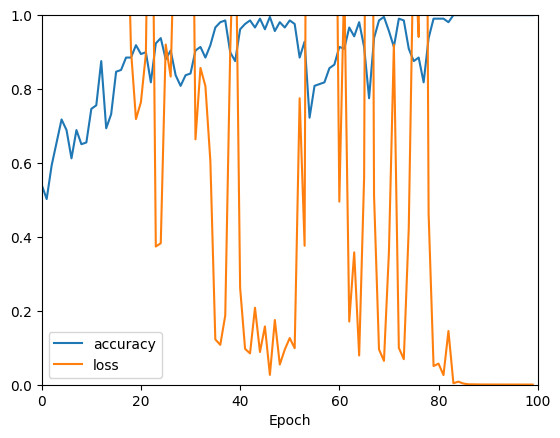

In [23]:
import matplotlib.pyplot as plt
df.plot(xlim=[0,100],ylim=[0,1],xlabel='Epoch')
plt.show()

In [25]:
preds=model.predict(X_test_scaled)
y_pred = (preds > 0.5)
y_pred[:4]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[False,  True],
       [False,  True],
       [False,  True],
       [False,  True]])

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.71      0.57        17
           1       0.80      0.61      0.69        33

   micro avg       0.64      0.64      0.64        50
   macro avg       0.64      0.66      0.63        50
weighted avg       0.69      0.64      0.65        50
 samples avg       0.64      0.64      0.64        50

